In [1]:
# importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
df_inf = pd.read_csv("PCOS_infertility.csv")
df_woinf = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name='Full_new')

In [3]:
df_woinf.shape

(541, 45)

In [4]:
df_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [5]:
# df has a column which is unknown so dropping that column
final_df = df_woinf.drop(columns=['Unnamed: 44'])

In [6]:
final_df.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [7]:
# there are 4 object datatypes in the df but they are all in numeric form
# so converting the object dt to numeric.

final_df["AMH(ng/mL)"] = pd.to_numeric(final_df["AMH(ng/mL)"], errors='coerce')
final_df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(final_df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [8]:
# checking for missing values
final_df.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [9]:
# there are 4 columns which have 1 missing value
# replacing the missing value with the median


final_df['Marraige Status (Yrs)'].fillna(final_df['Marraige Status (Yrs)'].median(),inplace=True)
final_df['II    beta-HCG(mIU/mL)'].fillna(final_df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
final_df['AMH(ng/mL)'].fillna(final_df['AMH(ng/mL)'].median(),inplace=True)
final_df['Fast food (Y/N)'].fillna(final_df['Fast food (Y/N)'].median(),inplace=True)

In [10]:
final_df['PCOS (Y/N)'].value_counts(normalize=True)

0    0.672828
1    0.327172
Name: PCOS (Y/N), dtype: float64

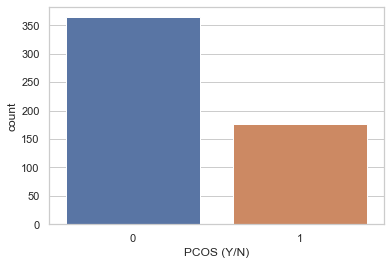

In [11]:
sns.countplot(x=final_df['PCOS (Y/N)'])
plt.show()

In [12]:
# analysis of PCOS (Y) and Pimple(Y/N)
values = final_df[final_df['PCOS (Y/N)'] == 1]['Pimples(Y/N)'].value_counts(normalize=True)
values

1    0.694915
0    0.305085
Name: Pimples(Y/N), dtype: float64

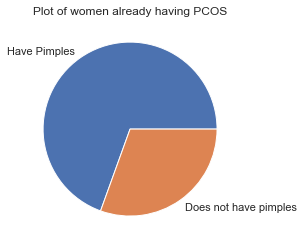

In [13]:
plt.pie(values, labels=['Have Pimples', 'Does not have pimples'])
plt.title("Plot of women already having PCOS")
plt.show()


In [14]:
# analysis of PCOS (Y) and Skin darkening
values = final_df[final_df['PCOS (Y/N)'] == 1]['Skin darkening (Y/N)'].value_counts(normalize=True)
values

1    0.621469
0    0.378531
Name: Skin darkening (Y/N), dtype: float64

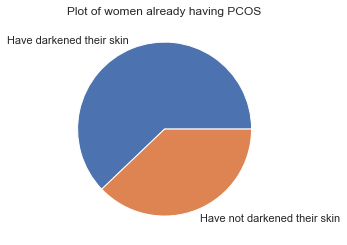

In [15]:
plt.pie(values, labels=['Have darkened their skin', 'Have not darkened their skin'])
plt.title('Plot of women already having PCOS')
plt.show()

In [16]:
# analysis of PCOS (Y) and Hair Growth
values = final_df[final_df['PCOS (Y/N)'] == 1]['hair growth(Y/N)'].value_counts(normalize=True)
values

1    0.570621
0    0.429379
Name: hair growth(Y/N), dtype: float64

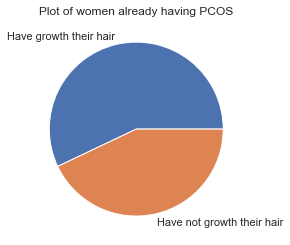

In [17]:
plt.pie(values, labels=['Have growth their hair', 'Have not growth their hair'])
plt.title('Plot of women already having PCOS')
plt.show()

In [18]:
# analysis of PCOS (Y) and Weight gain
values = final_df[final_df['PCOS (Y/N)'] == 1]['Weight gain(Y/N)'].value_counts(normalize=True)
values

1    0.683616
0    0.316384
Name: Weight gain(Y/N), dtype: float64

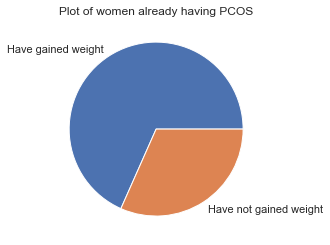

In [19]:
plt.pie(values, labels=['Have gained weight', 'Have not gained weight'])
plt.title('Plot of women already having PCOS')
plt.show()


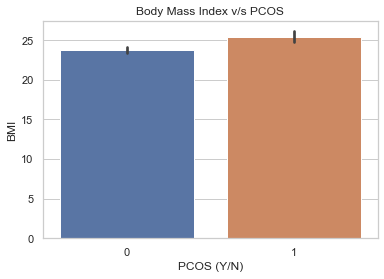

In [20]:
sns.barplot(x=final_df['PCOS (Y/N)'], y=final_df['BMI'])
plt.title('Body Mass Index v/s PCOS')
plt.show()

In [21]:
#Examaning a correlation matrix of all the features

corrmat = final_df.corr()

#How all the features correlate with the PCOS

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

In [22]:
# analysis of PCOS (N) and Pimple(Y/N)
values = final_df[final_df['PCOS (Y/N)'] == 0]['Pimples(Y/N)'].value_counts(normalize=True)
values

0    0.60989
1    0.39011
Name: Pimples(Y/N), dtype: float64

In [23]:
# analysis of PCOS (N) and Skin darkening (Y/N)
values = final_df[final_df['PCOS (Y/N)'] == 0]['Skin darkening (Y/N)'].value_counts(normalize=True)
values

0    0.846154
1    0.153846
Name: Skin darkening (Y/N), dtype: float64

In [24]:
# analysis of PCOS (N) and hair growth (Y/N)
values = final_df[final_df['PCOS (Y/N)'] == 0]['hair growth(Y/N)'].value_counts(normalize=True)
values

0    0.870879
1    0.129121
Name: hair growth(Y/N), dtype: float64

In [25]:
# analysis of PCOS (N) and weight gain (Y/N)
values = final_df[final_df['PCOS (Y/N)'] == 0]['Weight gain(Y/N)'].value_counts(normalize=True)
values

0    0.771978
1    0.228022
Name: Weight gain(Y/N), dtype: float64

In [26]:
# we can remove some columns which have no or very less impact on the output
corr_features=corrmat['PCOS (Y/N)'].abs().sort_values(ascending=False)

#features with correlation more than 0.4

corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [27]:
X = final_df[corr_features]
Y = final_df['PCOS (Y/N)']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [30]:
X_train.shape, X_test.shape

((432, 7), (109, 7))

In [31]:
Y_train.shape, Y_test.shape

((432,), (109,))

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
model.score(X_test, Y_test)

0.9908256880733946

In [36]:
model.score(X_train, Y_train)

0.9976851851851852

In [37]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [38]:
np.array(Y_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)